In [1]:
from json_utils import read_jsonl

# Most basic stuff for EDA.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Core packages for text processing.

import string
import re

# Libraries for text preprocessing.

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Loading some sklearn packaces for modelling.

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score

# Some packages for word clouds and NER.

from wordcloud import WordCloud, STOPWORDS
from collections import Counter, defaultdict
from PIL import Image
import spacy

# Core packages for general use throughout the notebook.

import random
import warnings
import time
import datetime

# For customizing our plots.

from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

# Setting some options for general use.

stop = set(stopwords.words('english'))
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')


#Setting seeds for consistent results.
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)

[nltk_data] Downloading package stopwords to /home/carbon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/carbon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/carbon/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/carbon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data = read_jsonl("../data/dkpol_tweets.jsonl")

Reading ../data/dkpol_tweets.jsonl


In [3]:
df = pd.DataFrame(data, columns=["auther_id", "created_at", "text"])

In [4]:
df["text_len"] = df["text"].apply(lambda x: len(x))

In [51]:
def plot_hist_boxplot(df, feature, title):
    fig = plt.figure(tight_layout=True, figsize=(18, 10))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title("Histogram Tweet Texts Lengths")
    sns.distplot(df.loc[:, feature],
                hist=True,
                kde=True,
                ax=ax1,
                color="#e74c3c")
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax1.tick_params()

    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.
    sns.distplot(df.loc[:, feature],
                 ax=ax2,
                 kde_kws={'cumulative': True},
                 hist_kws={'cumulative': True},
                 color='#e74c3c')
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative Probability')

    # Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title.
    ax3.set_title('Box Plot')
    # Plotting the box plot.
    sns.boxplot(x=feature, data=df, orient='v', ax=ax3, color='#e74c3c')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=25))
    
    plt.suptitle(f'{title}', fontsize=24)

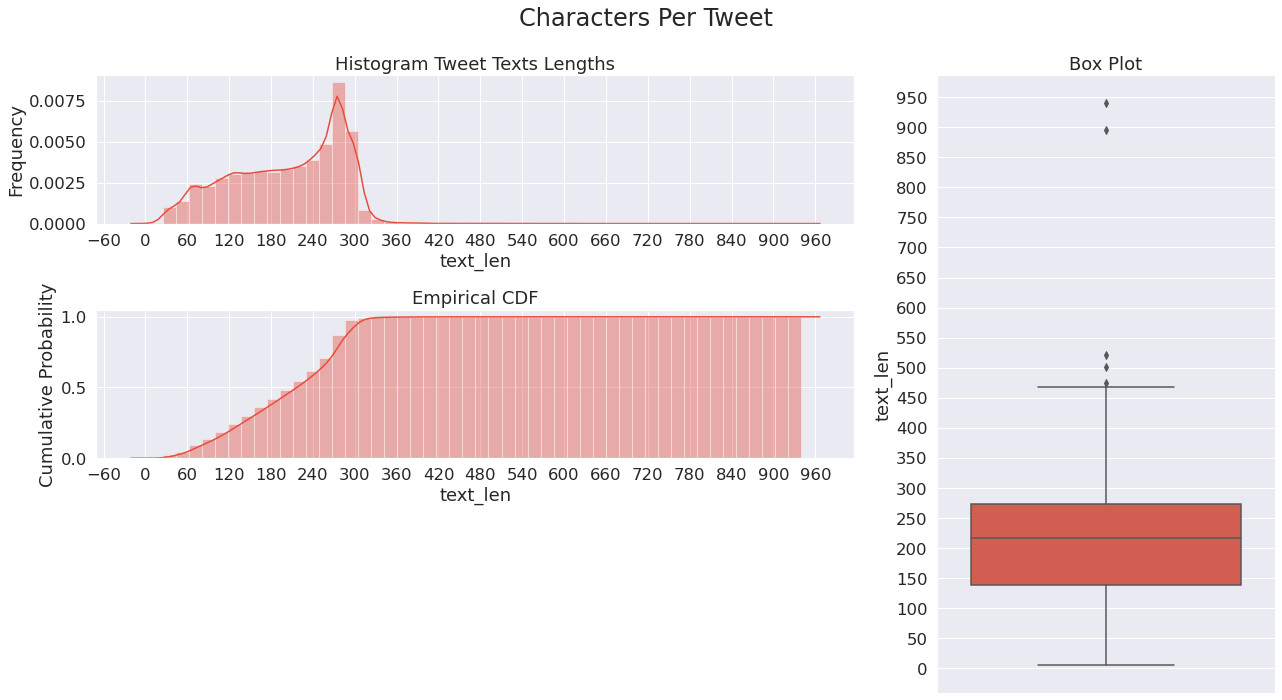

In [52]:
plot_hist_boxplot(df, "text_len", "Characters Per Tweet")

In [54]:
df1 =  pd.DataFrame(data)

In [94]:
df1.context_annotations.dropna().iloc[]

AttributeError: 'list' object has no attribute 'iloc'

In [116]:
df1.loc[~df1.context_annotations.isna()].context_annotations.apply(lambda x: x[0]['domain']['name']).value_counts()

Ongoing News Story                2301
Person                            2273
Holiday                           2263
Brand Category                     959
Brand Vertical                     817
TV Shows                           707
Interests and Hobbies Vertical     621
Entities [Entity Service]          283
Brand                              250
Political Body                     225
Sports Team                        134
Interests and Hobbies Category      98
Political Race                      93
Sports Event                        91
Multimedia Franchise                63
Movie Genre                         33
Sport                               27
Music Genre                         26
Interests and Hobbies               20
Video Game                          17
Sports League                       11
Movie                                7
Unified Twitter Taxonomy             6
Product                              3
Book Genre                           2
Video Game Hardware      

In [117]:
df1.loc[~df1.context_annotations.isna()].context_annotations.apply(lambda x: x[0]['entity']['name']).value_counts()

COVID-19                          2301
New Years Eve                     1952
Services                           894
PGA Tour Golf                      468
Donald Trump                       340
                                  ... 
Pantera                              1
US Central Intelligence Agency       1
NowThis                              1
Werner Kogler                        1
PlayStation                          1
Name: context_annotations, Length: 609, dtype: int64

In [137]:
df1.loc[~df1.context_annotations.isna()].iloc[3].context_annotations

[{'domain': {'description': 'Named people in the world like Nelson Mandela',
   'id': '10',
   'name': 'Person'},
  'entity': {'description': 'Silvio Berlusconi',
   'id': '880735922685333504',
   'name': 'Silvio Berlusconi'}},
 {'domain': {'description': 'Politicians in the world, like Joe Biden',
   'id': '35',
   'name': 'Politician'},
  'entity': {'description': 'Silvio Berlusconi',
   'id': '880735922685333504',
   'name': 'Silvio Berlusconi'}}]

In [132]:
df1.iloc[3].context_annotations

[{'domain': {'description': 'Television shows from around the world',
   'id': '3',
   'name': 'TV Shows'},
  'entity': {'description': 'Classic action from the PGA Tour.',
   'id': '10000280885',
   'name': 'PGA Tour Golf'}},
 {'domain': {'description': 'Television shows from around the world',
   'id': '3',
   'name': 'TV Shows'},
  'entity': {'description': 'Golfing action from the PGA Tour.',
   'id': '10029190485',
   'name': 'Live: The Masters PGA Tour Golf'}},
 {'domain': {'description': '', 'id': '26', 'name': 'Sports League'},
  'entity': {'description': 'PGA Tour',
   'id': '1046519692813193216',
   'name': 'PGA Tour'}}]

In [133]:
df1.iloc[3].text

'Denne lille pige var tæt på at dø pga farlige "legetøjsmagneter" købt på online markedspladser. De sælges stadig. @DanskErhverv opfordrer til at ændre #DSA\'en, ellers bliver dette hverdag. #eu #dkpol @SchaldemoseMEP @fbrtaenk @LisbethBNielsen @AnneStergaa \nhttps://t.co/kZ6c9JSw2G'